In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1e33d4fba64ec05c385153388b32128


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | gazanjyk
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | bereda
Processing Record 8 of Set 1 | carndonagh
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | ostersund
Processing Record 12 of Set 1 | san quintin
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | clifton
Processing Record 15 of Set 1 | cape coast
Processing Record 16 of Set 1 | torbay
Processing Record 17 of Set 1 | antofagasta
Processing Record 18 of Set 1 | pisco
Processing Record 19 of Set 1 | chuy
Processing Record 20 of Set 1 | posse
Processing Record 21 of Set 1 | nhulunbuy
Processing Record 22 of Set 1 | port alfred
Processing Record 23 of Set 1 | atuona


Processing Record 41 of Set 4 | iquitos
Processing Record 42 of Set 4 | pitman
Processing Record 43 of Set 4 | praia
Processing Record 44 of Set 4 | lavrentiya
Processing Record 45 of Set 4 | henties bay
Processing Record 46 of Set 4 | kununurra
Processing Record 47 of Set 4 | jacmel
Processing Record 48 of Set 4 | scarborough
Processing Record 49 of Set 4 | little current
Processing Record 50 of Set 4 | xuddur
Processing Record 1 of Set 5 | tubruq
City not found. Skipping...
Processing Record 2 of Set 5 | lumphat
Processing Record 3 of Set 5 | dingle
Processing Record 4 of Set 5 | vao
Processing Record 5 of Set 5 | kavieng
Processing Record 6 of Set 5 | portland
Processing Record 7 of Set 5 | ribeira grande
Processing Record 8 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 9 of Set 5 | tecoanapa
Processing Record 10 of Set 5 | laguna
Processing Record 11 of Set 5 | nome
Processing Record 12 of Set 5 | gravelbourg
Processing Record 13 of Set 5 | januaria
Processing Re

Processing Record 30 of Set 8 | mogzon
Processing Record 31 of Set 8 | nemuro
Processing Record 32 of Set 8 | richards bay
Processing Record 33 of Set 8 | mahajanga
Processing Record 34 of Set 8 | qaqortoq
Processing Record 35 of Set 8 | ahuimanu
Processing Record 36 of Set 8 | te anau
Processing Record 37 of Set 8 | grand centre
City not found. Skipping...
Processing Record 38 of Set 8 | diffa
Processing Record 39 of Set 8 | tumut
Processing Record 40 of Set 8 | kunda
Processing Record 41 of Set 8 | svetlogorsk
Processing Record 42 of Set 8 | sarakhs
Processing Record 43 of Set 8 | maymyo
Processing Record 44 of Set 8 | iskateley
Processing Record 45 of Set 8 | sao goncalo do sapucai
Processing Record 46 of Set 8 | san vicente
Processing Record 47 of Set 8 | eyrarbakki
Processing Record 48 of Set 8 | cherskiy
Processing Record 49 of Set 8 | rio grande
Processing Record 50 of Set 8 | annau
Processing Record 1 of Set 9 | kuche
City not found. Skipping...
Processing Record 2 of Set 9 | p

Processing Record 15 of Set 12 | sahrak
City not found. Skipping...
Processing Record 16 of Set 12 | marcona
City not found. Skipping...
Processing Record 17 of Set 12 | nelson bay
Processing Record 18 of Set 12 | sao felix do xingu
Processing Record 19 of Set 12 | boden
Processing Record 20 of Set 12 | barabai
Processing Record 21 of Set 12 | stoyba
City not found. Skipping...
Processing Record 22 of Set 12 | gazni
City not found. Skipping...
Processing Record 23 of Set 12 | mayo
Processing Record 24 of Set 12 | punta cardon
Processing Record 25 of Set 12 | srostki
Processing Record 26 of Set 12 | ekibastuz
Processing Record 27 of Set 12 | okha
Processing Record 28 of Set 12 | mouzakion
City not found. Skipping...
Processing Record 29 of Set 12 | witu
Processing Record 30 of Set 12 | nguiu
City not found. Skipping...
Processing Record 31 of Set 12 | jaque
Processing Record 32 of Set 12 | omboue
Processing Record 33 of Set 12 | milas
Processing Record 34 of Set 12 | myitkyina
Processin

In [10]:
len(city_data)

542

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,35.60,64,27,7.18,AR,2020-06-18 19:57:59
1,Gazanjyk,39.24,55.52,85.17,13,0,14.18,TM,2020-06-18 19:57:59
2,Puerto Ayora,-0.74,-90.35,84.20,51,50,9.17,EC,2020-06-18 19:57:59
3,Albany,42.60,-73.97,88.00,57,39,1.99,US,2020-06-18 19:57:59
4,Jamestown,42.10,-79.24,80.60,54,75,9.17,US,2020-06-18 19:49:35
5,Hobart,-42.88,147.33,39.99,100,100,4.70,AU,2020-06-18 19:53:11
6,Bereda,43.27,-7.54,61.00,82,33,4.00,ES,2020-06-18 19:58:00
7,Carndonagh,55.25,-7.27,58.89,86,100,3.67,IE,2020-06-18 19:58:00
8,Saint-Philippe,-21.36,55.77,71.60,68,40,12.75,RE,2020-06-18 19:49:46
9,Busselton,-33.65,115.33,41.00,97,51,3.42,AU,2020-06-18 19:49:47


In [12]:
# Re arragne DataFrame labels
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2020-06-18 19:57:59,-54.80,-68.30,35.60,64,27,7.18
1,Gazanjyk,TM,2020-06-18 19:57:59,39.24,55.52,85.17,13,0,14.18
2,Puerto Ayora,EC,2020-06-18 19:57:59,-0.74,-90.35,84.20,51,50,9.17
3,Albany,US,2020-06-18 19:57:59,42.60,-73.97,88.00,57,39,1.99
4,Jamestown,US,2020-06-18 19:49:35,42.10,-79.24,80.60,54,75,9.17
...,...,...,...,...,...,...,...,...,...
537,Adrar,MR,2020-06-18 19:46:07,20.50,-10.07,101.43,14,56,14.25
538,Poum,NC,2020-06-18 19:59:55,-20.23,164.02,74.39,75,100,14.07
539,Da Nang,VN,2020-06-18 19:59:56,16.07,108.22,82.40,78,20,2.24
540,Veliko Gradiste,RS,2020-06-18 19:59:56,44.76,21.51,64.00,92,67,5.14


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1592511023.9553459

In [20]:
today=time.strftime("%x")
today

'06/18/20'

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

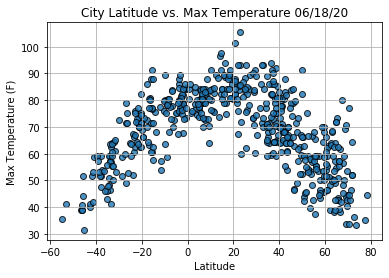

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

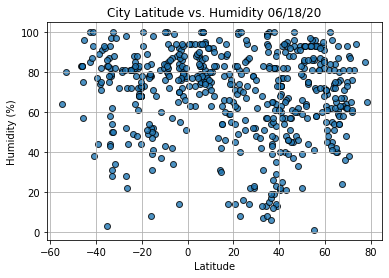

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

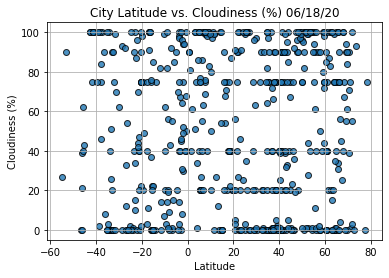

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

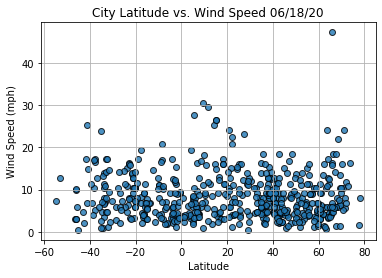

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()